# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape,output_units=10,num_neurons=[512,216,128]):
    """
    Build your own model
    """
    input_layer=keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units,activation='relu',name="hidden_layer"+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n_units,activation='relu',name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95


In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W1216 14:59:32.810996 12540 deprecation_wrapper.py:119] From C:\Users\ray123\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1216 14:59:32.812998 12540 deprecation_wrapper.py:119] From C:\Users\ray123\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1216 14:59:32.836014 12540 deprecation_wrapper.py:119] From C:\Users\ray123\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1216 14:59:32.838016 12540 deprecation_wrapper.py:119] From C:\Users\ray123\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1216 14:59:32.842019 12

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 216)               110808    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,713,250
Trainable params: 1,713,250
Non-trainable params: 0
_________________________________________________________________


W1216 14:59:33.055005 12540 deprecation.py:323] From C:\Users\ray123\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 196us/step - loss: 2.1140 - acc: 0.2052 - val_loss: 1.9700 - val_acc: 0.2467
Epoch 2/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.8939 - acc: 0.2987 - val_loss: 1.8484 - val_acc: 0.3318
Epoch 3/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.8385 - acc: 0.3317 - val_loss: 1.8512 - val_acc: 0.3308
Epoch 4/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.8061 - acc: 0.3495 - val_loss: 1.7842 - val_acc: 0.3624
Epoch 5/10
50000/50000 [==============================] - 9s 189us/step - loss: 1.7962 - acc: 0.3453 - val_loss: 1.8752 - val_acc: 0.3142
Epoch 6/10
50000/50000 [==============================] - 9s 183us/step - loss: 1.7918 - acc: 0.3465 - val_loss: 1.8769 - val_acc: 0.3442
Epoch 7/10
50000/50000 [==============================] - 9s 173us/step - loss: 1.7449 - acc: 0.3727 - val_loss: 1.753

50000/50000 [==============================] - 9s 174us/step - loss: 1.9271 - acc: 0.3281 - val_loss: 1.9173 - val_acc: 0.3376
Epoch 7/10
50000/50000 [==============================] - 9s 175us/step - loss: 1.9009 - acc: 0.3398 - val_loss: 1.8924 - val_acc: 0.3381
Epoch 8/10
50000/50000 [==============================] - 9s 176us/step - loss: 1.8778 - acc: 0.3459 - val_loss: 1.8716 - val_acc: 0.3526
Epoch 9/10
50000/50000 [==============================] - 9s 177us/step - loss: 1.8587 - acc: 0.3528 - val_loss: 1.8537 - val_acc: 0.3544
Epoch 10/10
50000/50000 [==============================] - 9s 177us/step - loss: 1.8419 - acc: 0.3585 - val_loss: 1.8382 - val_acc: 0.3635
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)     

C:\Users\ray123\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['font.serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


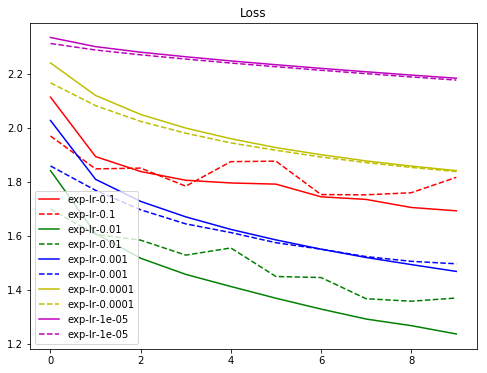

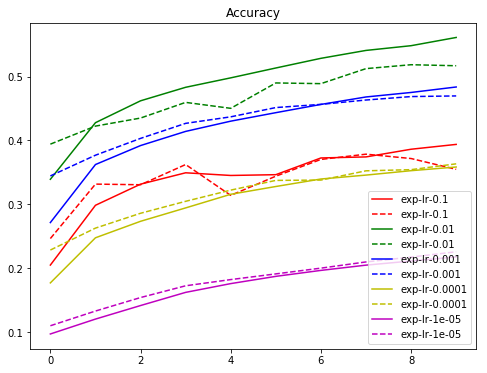

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()